In [58]:
#************************************************* Caution: NETWORK  at WORK *************************************************#

In [1]:
from scipy import linalg
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import tensorflow as tf
import datetime

In [3]:
#reading data frame
df=pd.read_csv(r'C:\Users\iamaf\OneDrive\Desktop\OneDrive - Indian Institute of Science\reja_awadhesh\NN_data\data_N4.csv')

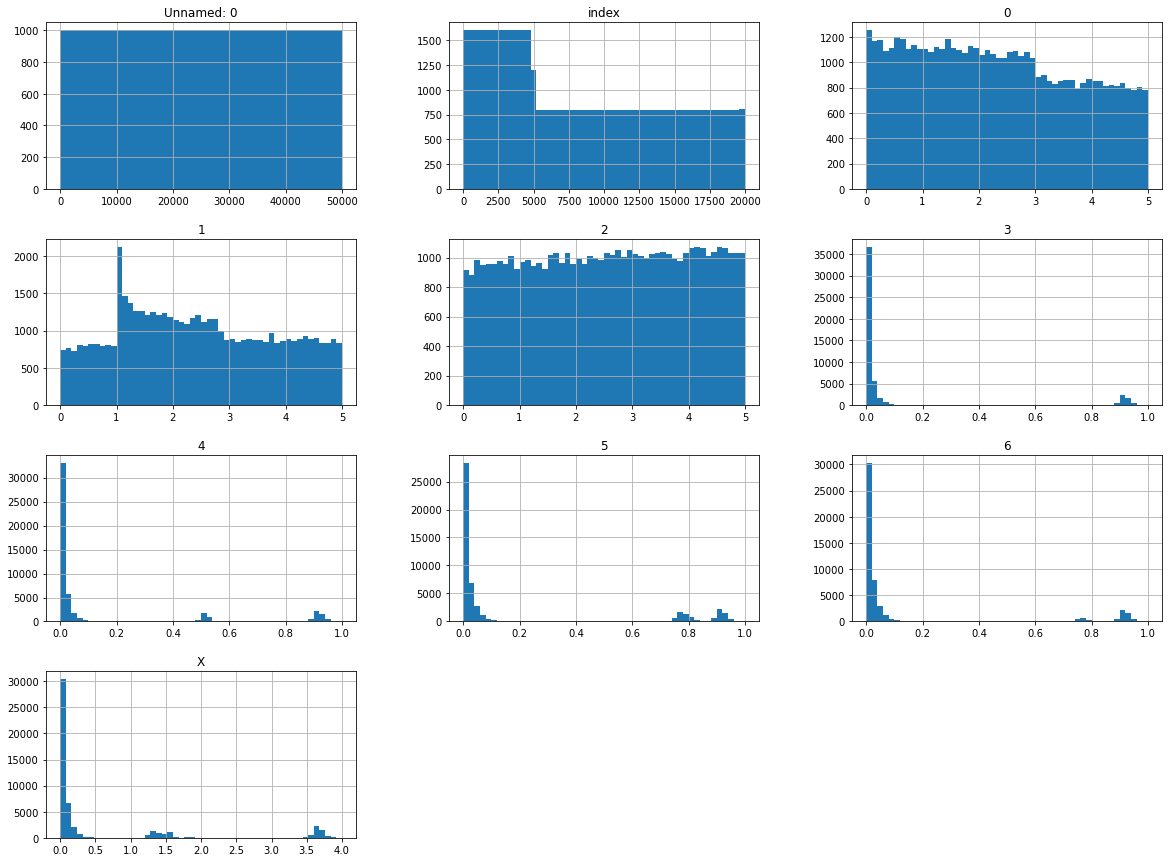

In [4]:
%matplotlib inline 
import matplotlib.pyplot as plt
df.hist(bins=50, figsize=(20,15))
plt.show()

In [5]:
df

,Unnamed: 0,index,0,1,2,3,4,5,6,X
0,0,10124,0.678,0.739000,0.791,0.003461,0.003616,0.005533,0.005533,0.018143
1,1,4512,0.804,1.146116,4.424,0.002871,0.517205,0.791381,0.004590,1.316048
2,2,18342,2.951,4.522000,3.085,0.006552,0.006847,0.032764,0.032764,0.078927
3,3,1618,0.449,1.240574,0.838,0.067286,0.555547,0.850048,0.107582,1.580464
4,4,11385,0.033,4.663000,4.127,0.000001,0.000666,0.001018,0.000002,0.001687
...,...,...,...,...,...,...,...,...,...,...
49998,49998,4426,3.409,3.333000,4.024,0.050737,0.058553,0.089592,0.081122,0.280004
49999,49999,1994,4.335,1.002000,2.212,0.001892,0.001977,0.003024,0.003024,0.009917
50000,50000,1260,3.830,3.064000,3.484,0.032075,0.032073,0.032076,0.032073,0.128298
50001,50001,15505,3.608,2.942000,1.942,0.020316,0.022314,0.034143,0.032483,0.109256


In [6]:
# ndf=df.drop(df[(df['Order']<1) & (df['Order']>0.5)].index)
# ndf

In [6]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size=0.10, random_state=42)

In [7]:
X_train = train[['0','1','2']].values

Y_train = train[['X']].values

In [8]:
X_test = test[['0','1','2']].values

Y_test = test[['X']].values

In [9]:
# Clear any logs from previous runs
#rm -rf ./logs/

In [10]:
# keras:
from tensorflow.keras import Sequential # Sequential is the neural-network class
from tensorflow.keras.layers import Dense # Dense is the standard network layer
import matplotlib.pyplot as plt
%matplotlib inline

In [68]:
################# Building the Neural_Network


Net=Sequential() # creating a neural network!
Net.add(Dense(32,input_shape=(3,),activation="relu")) # first hidden layer: 20 neurons (and 1 input neuron!)
Net.add(Dense(16,activation="relu")) # second hidden layer: 10 neurons
Net.add(Dense(1,activation="linear")) # output layer: 1 neuron


# Compile network: (randomly initialize weights, choose advanced optimizer, set up everything!)
Net.compile(loss='mean_squared_error',
              optimizer='adam') # adam is adaptive and works better than normal gradient descent


In [69]:
# log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
# tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

Net.fit(x=X_train, 
          y=Y_train, 
          epochs=200, batch_size=32,shuffle=True,
          validation_data=(X_test, Y_test))

Epoch 1/200
1407/1407 [==============================] - 1s 769us/step - loss: 0.6118 - val_loss: 0.3390
Epoch 2/200
1407/1407 [==============================] - 1s 702us/step - loss: 0.2451 - val_loss: 0.1937
Epoch 3/200
1407/1407 [==============================] - 1s 694us/step - loss: 0.1629 - val_loss: 0.1458
Epoch 4/200
1407/1407 [==============================] - 1s 714us/step - loss: 0.1345 - val_loss: 0.1222
Epoch 5/200
1407/1407 [==============================] - 1s 703us/step - loss: 0.1170 - val_loss: 0.1142
Epoch 6/200
1407/1407 [==============================] - 1s 673us/step - loss: 0.1088 - val_loss: 0.0996
Epoch 7/200
1407/1407 [==============================] - 1s 699us/step - loss: 0.1023 - val_loss: 0.0954
Epoch 8/200
1407/1407 [==============================] - 1s 703us/step - loss: 0.0977 - val_loss: 0.0921
Epoch 9/200
1407/1407 [==============================] - 1s 707us/step - loss: 0.0928 - val_loss: 0.0904
Epoch 10/200
1407/1407 [==============================]

In [70]:
History=Net.history.history
#History

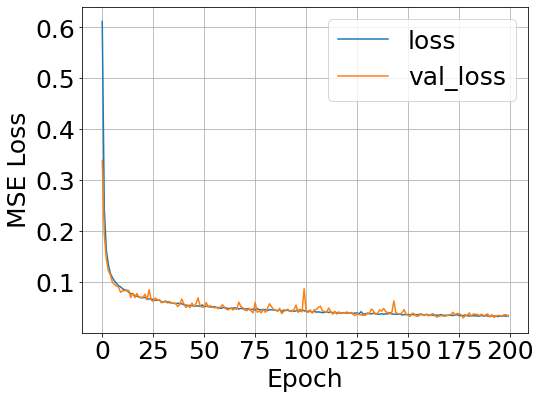

In [71]:
pd.DataFrame(Net.history.history).plot(figsize=(8, 6))
plt.grid(True)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.legend(fontsize=25)
plt.ylabel('MSE Loss', fontsize=25)
plt.xlabel('Epoch', fontsize=25)
#plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
# plt.show()
plt.savefig(r'\Users\iamaf\OneDrive\Desktop\OneDrive - Indian Institute of Science\reja_awadhesh\EP_ML\Loss_4site.png', bbox_inches='tight',dpi=600)

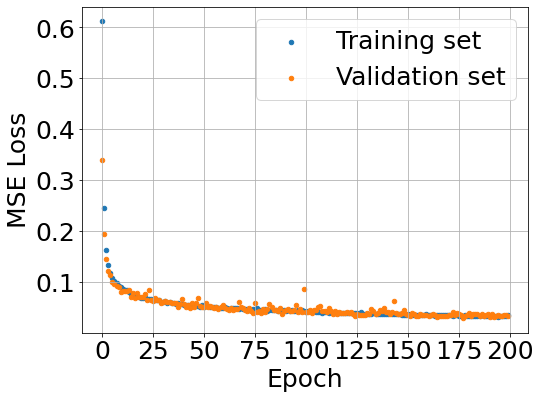

In [118]:
plt.figure(figsize=(8, 6))
plt.grid(True)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
train_loss = History['loss']
val_loss = History['val_loss']

plt.scatter(range(len(train_loss)), train_loss, label='Training set',s=20)
plt.scatter(range(len(val_loss)), val_loss, label='Validation set',s=20)
plt.ylabel('MSE Loss', fontsize=25)
plt.xlabel('Epoch', fontsize=25)
plt.legend(fontsize=25)
#plt.show()
plt.savefig(r'\Users\iamaf\OneDrive\Desktop\OneDrive - Indian Institute of Science\reja_awadhesh\EP_ML\Loss_4siteS.png', bbox_inches='tight',dpi=600)

In [73]:
####################### Totoal No of parameters to tune
Net.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 32)                128       
                                                                 
 dense_4 (Dense)             (None, 16)                528       
                                                                 
 dense_5 (Dense)             (None, 1)                 17        
                                                                 
Total params: 673
Trainable params: 673
Non-trainable params: 0
_________________________________________________________________


In [74]:
Net.save(r"\Users\iamaf\OneDrive\Desktop\OneDrive - Indian Institute of Science\reja_awadhesh\EP_ML\Model_4site.h5")

In [75]:
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error

In [76]:
Y_pred = Net.predict(X_test)
Y_pred

157/157 [==============================] - 0s 583us/step


array([[1.0206755 ],
       [0.01828811],
       [1.352263  ],
       ...,
       [0.02292868],
       [0.04344413],
       [0.07535288]], dtype=float32)

In [77]:
print("R^2 : ", r2_score(Y_test, Y_pred))
print("MAE :", mean_absolute_error(Y_test,Y_pred))
print("RMSE:",np.sqrt(mean_squared_error(Y_test, Y_pred)))

R^2 :  0.9742593073551674
MAE : 0.0884053512105855
RMSE: 0.18095308390772255


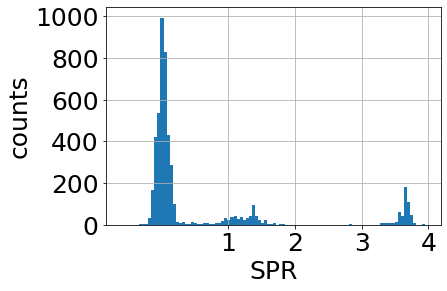

In [111]:
N, bins, patches = plt.hist(Y_pred,bins=100)
plt.xlabel(r'SPR',fontsize=25)
plt.ylabel("counts",fontsize=25)
plt.xticks([1,2,3,4],fontsize=25)
plt.yticks(fontsize=25)
plt.grid()
#plt.ylabel("no of points")
plt.savefig(r'\Users\iamaf\OneDrive\Desktop\OneDrive - Indian Institute of Science\reja_awadhesh\EP_ML\pred_4site.png', bbox_inches='tight',dpi=600)

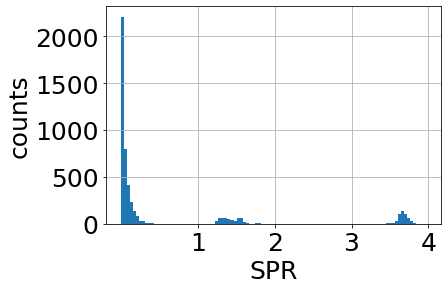

In [110]:
N, bins, patches = plt.hist(Y_test,bins=100)
plt.xlabel(r'SPR',fontsize=25)
plt.ylabel("counts",fontsize=25)
plt.xticks([1,2,3,4],fontsize=25)
plt.yticks(fontsize=25)
plt.grid()
#plt.ylabel("no of points")
plt.savefig(r'\Users\iamaf\OneDrive\Desktop\OneDrive - Indian Institute of Science\reja_awadhesh\EP_ML\actual_4site.png', bbox_inches='tight',dpi=600)

In [80]:
new_data = np.column_stack((X_test, Y_pred))
pred=pd.DataFrame(new_data)
B_pred=pred
B_pred

,0,1,2,3
0,0.576,1.085686,3.872,1.020676
1,4.117,0.210000,4.132,0.018288
2,3.455,4.086896,3.867,1.352263
3,0.318,3.531000,0.387,-0.074246
4,1.835,4.620000,3.272,-0.036325
...,...,...,...,...
4996,3.671,1.627000,0.907,0.149256
4997,0.115,2.437000,1.432,-0.079307
4998,3.705,0.522000,3.059,0.022929
4999,2.771,2.481000,0.419,0.043444


In [81]:
new_data = np.column_stack((X_test, Y_test))
A_test=pd.DataFrame(new_data)
A_test

,0,1,2,3
0,0.576,1.085686,3.872,1.268637
1,4.117,0.210000,4.132,0.011072
2,3.455,4.086896,3.867,1.570998
3,0.318,3.531000,0.387,0.003440
4,1.835,4.620000,3.272,0.019236
...,...,...,...,...
4996,3.671,1.627000,0.907,0.098908
4997,0.115,2.437000,1.432,0.006787
4998,3.705,0.522000,3.059,0.007533
4999,2.771,2.481000,0.419,0.023743


In [82]:
def SPR(value):
    if value < 1:
        return 0
    if 1 <= value < 2:
        return 2
    elif 2 <= value < 3:
        return 3
    elif 3 <= value < 4:
        return 4

In [83]:
A_test['SPR'] = A_test[3].map(SPR)
A_test

,0,1,2,3,SPR
0,0.576,1.085686,3.872,1.268637,2
1,4.117,0.210000,4.132,0.011072,0
2,3.455,4.086896,3.867,1.570998,2
3,0.318,3.531000,0.387,0.003440,0
4,1.835,4.620000,3.272,0.019236,0
...,...,...,...,...,...
4996,3.671,1.627000,0.907,0.098908,0
4997,0.115,2.437000,1.432,0.006787,0
4998,3.705,0.522000,3.059,0.007533,0
4999,2.771,2.481000,0.419,0.023743,0


In [84]:
B_pred['SPR'] = B_pred[3].map(SPR)
B_pred

,0,1,2,3,SPR
0,0.576,1.085686,3.872,1.020676,2
1,4.117,0.210000,4.132,0.018288,0
2,3.455,4.086896,3.867,1.352263,2
3,0.318,3.531000,0.387,-0.074246,0
4,1.835,4.620000,3.272,-0.036325,0
...,...,...,...,...,...
4996,3.671,1.627000,0.907,0.149256,0
4997,0.115,2.437000,1.432,-0.079307,0
4998,3.705,0.522000,3.059,0.022929,0
4999,2.771,2.481000,0.419,0.043444,0


In [94]:
count_A_test = (A_test.iloc[:,4] == 4).sum()
count_A_test

508

In [95]:
count_B_pred = (B_pred.iloc[:,4] == 4).sum()
count_B_pred

519

In [96]:
C3 = A_test.drop(A_test.columns[3], axis=1)
C3

,0,1,2,SPR
0,0.576,1.085686,3.872,2
1,4.117,0.210000,4.132,0
2,3.455,4.086896,3.867,2
3,0.318,3.531000,0.387,0
4,1.835,4.620000,3.272,0
...,...,...,...,...
4996,3.671,1.627000,0.907,0
4997,0.115,2.437000,1.432,0
4998,3.705,0.522000,3.059,0
4999,2.771,2.481000,0.419,0


In [97]:
C4 = B_pred.drop(B_pred.columns[3], axis=1)
C4

,0,1,2,SPR
0,0.576,1.085686,3.872,2
1,4.117,0.210000,4.132,0
2,3.455,4.086896,3.867,2
3,0.318,3.531000,0.387,0
4,1.835,4.620000,3.272,0
...,...,...,...,...
4996,3.671,1.627000,0.907,0
4997,0.115,2.437000,1.432,0
4998,3.705,0.522000,3.059,0
4999,2.771,2.481000,0.419,0


In [89]:
C5=C3.compare(C4)
C5

SPR      
     self other
77    2.0   0.0
106   2.0   0.0
120   2.0   0.0
125   0.0   2.0
150   2.0   0.0
...   ...   ...
4880  0.0   2.0
4881  3.0   4.0
4938  2.0   0.0
4973  2.0   0.0
4978  2.0   0.0

[132 rows x 2 columns]

In [121]:
C5[C5.iloc[:,0]==0].shape

(48, 2)

In [122]:
C5[C5.iloc[:,0]==2].shape

(78, 2)

In [123]:
C5[C5.iloc[:,0]==4].shape

(0, 2)

In [124]:
78+48


126

In [126]:
(5000-126)/5000

0.9748